In [ ]:
from google.colab import drive
drive.mount('/content/drive') #note - you must add the shared ENG 4000 folder as a shortcut to your google drive in the /content/drive/MyDrive/ path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.gofplots import qqplot
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras import layers, optimizers, regularizers
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.metrics import Precision, Recall
import numpy as np

In [ ]:
#Import libraries needed for EDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD

#Import labels (these will the target variables we will use to predict)
labels = pd.read_csv("/content/drive/MyDrive/ENG 4000/labels.csv") 
labels.head()

,Sample ID,Pollen
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
#Import features (these will the be data we use to predict the labels)
lifetime = pd.read_csv("/content/drive/MyDrive/ENG 4000/lifetime.csv")
lifetime.head() #Head allows us to show the first 4 rows of the data

,Sample ID,"350-400 nm, t=0","350-400 nm, t=1","350-400 nm, t=2","350-400 nm, t=3","350-400 nm, t=4","350-400 nm, t=5","350-400 nm, t=6","350-400 nm, t=7","350-400 nm, t=8",...,"672-800 nm, t=14","672-800 nm, t=15","672-800 nm, t=16","672-800 nm, t=17","672-800 nm, t=18","672-800 nm, t=19","672-800 nm, t=20","672-800 nm, t=21","672-800 nm, t=22","672-800 nm, t=23"
0,0,-0.010454,0.000201,0.010856,0.114194,0.217531,0.166868,0.116204,0.109168,0.102131,...,-0.015480,-0.016084,-0.017089,-0.014877,-0.013068,-0.003418,0.006031,0.011460,0.016888,0.013872
1,1,0.119942,0.184249,0.248555,0.236994,0.225434,0.098988,-0.028179,-0.054191,-0.081647,...,0.013006,0.028179,0.043353,0.057081,0.070809,0.057081,0.043353,0.013728,-0.016618,-0.026012
2,2,-0.016149,0.063383,0.142915,0.286637,0.430359,0.262414,0.094469,0.082761,0.071054,...,0.024223,0.023819,0.023415,0.014534,0.005248,-0.009285,-0.024627,-0.027049,-0.030279,-0.015745
3,3,0.067116,0.198401,0.329687,0.366400,0.403114,0.235325,0.067536,0.063644,0.059752,...,-0.008100,-0.006627,-0.005365,-0.001999,0.001262,0.003787,0.006312,0.007469,0.008626,0.004103
4,4,-0.043760,0.090762,0.225284,0.214749,0.204214,0.213128,0.222042,0.133712,0.044571,...,-0.059157,-0.068882,-0.080227,-0.052674,-0.026742,-0.004052,0.017828,0.031605,0.045381,0.020259


In [ ]:
spectrum = pd.read_csv("/content/drive/MyDrive/ENG 4000/spectrum.csv")
spectrum.head()

,Sample ID,"350 nm, t=0","364 nm, t=0","379 nm, t=0","393 nm, t=0","408 nm, t=0","422 nm, t=0","437 nm, t=0","451 nm, t=0","466 nm, t=0",...,"669 nm, t=3","683 nm, t=3","698 nm, t=3","712 nm, t=3","727 nm, t=3","741 nm, t=3","756 nm, t=3","770 nm, t=3","785 nm, t=3","800 nm, t=3"
0,0,0.129278,0.041910,0.121054,0.496012,0.800121,1.000000,0.853183,0.962091,0.745947,...,0.000000,0.000000,0.0,0.000144,-0.000576,-0.000790,-0.000681,-0.000004,-0.000105,-1.480000e-19
1,1,-0.011963,0.086481,0.099374,0.132618,0.527263,0.820056,0.939995,1.000000,0.914903,...,0.000000,0.000000,0.0,0.000286,-0.001143,-0.001451,-0.001815,-0.000667,-0.000672,-9.580000e-19
2,2,-0.006165,0.110295,0.157199,0.232229,0.404684,0.739406,1.000000,0.887348,0.716564,...,0.000000,0.000000,0.0,0.000000,0.000000,-0.000157,0.000630,0.000892,0.000630,-3.147950e-04
3,3,-0.005657,0.036070,0.101411,0.245322,0.426752,0.674580,0.992005,1.000000,0.851382,...,-0.000191,0.000048,0.0,0.000000,0.000000,0.000000,-0.000130,0.000519,0.000606,1.038110e-03
4,4,-0.007325,0.063621,0.125746,0.214150,0.409600,0.782647,1.000000,0.770002,0.544802,...,0.001524,-0.000381,0.0,0.000466,-0.001863,-0.001919,-0.004657,-0.003952,-0.003444,-4.060000e-18


In [ ]:
scattering = pd.read_csv("/content/drive/MyDrive/ENG 4000/scattering.csv")
scattering.head()

,Sample ID,"angle=-37.5, t=0","angle=-37.5, t=1","angle=-37.5, t=2","angle=-37.5, t=3","angle=-37.5, t=4","angle=-37.5, t=5","angle=-37.5, t=6","angle=-37.5, t=7","angle=-37.5, t=8",...,"angle=37.5, t=110","angle=37.5, t=111","angle=37.5, t=112","angle=37.5, t=113","angle=37.5, t=114","angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119"
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,982.383616,1002.18053,1034.797552,892.183468,840.017425,739.383196,740.476799,600.65502,695.104062,873.792882
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [ ]:
size = pd.read_csv("/content/drive/MyDrive/ENG 4000/size.csv")
size.head()

,Unnamed: 0,size
0,0,12.513989
1,1,19.461646
2,2,25.726931
3,3,35.178985
4,4,4.672308


In [ ]:
lifetime_features = pd.read_csv("/content/drive/MyDrive/ENG 4000/lifetime_features.csv")
lifetime_features.head()

,Unnamed: 0,lt feature 1,lt feature 2,lt feature 3,lt feature 4
0,0,0.280202,1.0,0.134079,-0.008439
1,1,0.481173,1.0,0.266975,0.140432
2,2,0.519641,1.0,0.145762,0.002905
3,3,0.639556,1.0,0.305319,-0.015814
4,4,0.624575,1.0,0.396259,-0.059949


# Checking for duplicates and nulls

In [ ]:
data = {'lifetime':lifetime,
        'spectrum':spectrum,
        'scattering':scattering,
        'size':size,
        'lifetime_features':lifetime_features}
pd.set_option('display.max_rows',None)
for x in data:
  print(x)
  print(f'Nulls: {(data[x][data[x].isna().any(axis=1)].sum() > 0).sum()}')
  print(f'Duplicates: {data[x].duplicated().sum()}\n')

  #No null features so we will not need to adjust our dataset

lifetime
Nulls: 0
Duplicates: 0

spectrum
Nulls: 0
Duplicates: 0

scattering
Nulls: 0
Duplicates: 0

size
Nulls: 0
Duplicates: 0

lifetime_features
Nulls: 0
Duplicates: 0



# Check labels for nulls and duplicates

In [ ]:
labels.info() #Check the data types and how many nulls in the labels table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866 entries, 0 to 9865
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sample ID  9866 non-null   int64
 1   Pollen     9866 non-null   int64
dtypes: int64(2)
memory usage: 154.3 KB


In [ ]:
labels['Pollen'].unique() #There are 11 unique values for pollen, which correlates to 12 different types of pollen

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

# Combine features into one dataframe

In [ ]:
#Courtesy of Randy
features = pd.DataFrame()

for x in data:
  features = pd.concat([features,data[x].iloc[: , 1:]], axis=1)

features.head()

#Thanks Randy!!

,"350-400 nm, t=0","350-400 nm, t=1","350-400 nm, t=2","350-400 nm, t=3","350-400 nm, t=4","350-400 nm, t=5","350-400 nm, t=6","350-400 nm, t=7","350-400 nm, t=8","350-400 nm, t=9",...,"angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119",size,lt feature 1,lt feature 2,lt feature 3,lt feature 4
0,-0.010454,0.000201,0.010856,0.114194,0.217531,0.166868,0.116204,0.109168,0.102131,0.054684,...,0.000000,0.000000,0.00000,0.000000,0.000000,12.513989,0.280202,1.0,0.134079,-0.008439
1,0.119942,0.184249,0.248555,0.236994,0.225434,0.098988,-0.028179,-0.054191,-0.081647,-0.058526,...,0.000000,0.000000,0.00000,0.000000,0.000000,19.461646,0.481173,1.0,0.266975,0.140432
2,-0.016149,0.063383,0.142915,0.286637,0.430359,0.262414,0.094469,0.082761,0.071054,0.093258,...,0.000000,0.000000,0.00000,0.000000,0.000000,25.726931,0.519641,1.0,0.145762,0.002905
3,0.067116,0.198401,0.329687,0.366400,0.403114,0.235325,0.067536,0.063644,0.059752,0.032085,...,739.383196,740.476799,600.65502,695.104062,873.792882,35.178985,0.639556,1.0,0.305319,-0.015814
4,-0.043760,0.090762,0.225284,0.214749,0.204214,0.213128,0.222042,0.133712,0.044571,-0.012966,...,0.000000,0.000000,0.00000,0.000000,0.000000,4.672308,0.624575,1.0,0.396259,-0.059949


In [ ]:
features.info() #Check for nulls, appears to be all floating point entries for data about the pollen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866 entries, 0 to 9865
Columns: 2629 entries, 350-400 nm, t=0 to lt feature 4
dtypes: float64(2629)
memory usage: 197.9 MB


In [ ]:
features.describe() #We can further verify in describe()

,"350-400 nm, t=0","350-400 nm, t=1","350-400 nm, t=2","350-400 nm, t=3","350-400 nm, t=4","350-400 nm, t=5","350-400 nm, t=6","350-400 nm, t=7","350-400 nm, t=8","350-400 nm, t=9",...,"angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119",size,lt feature 1,lt feature 2,lt feature 3,lt feature 4
count,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,...,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000
mean,0.054501,0.129879,0.207672,0.278997,0.357199,0.278295,0.199518,0.146643,0.094979,0.066842,...,14.088371,12.621426,11.445568,10.200185,10.393801,26.204309,0.729342,0.919023,0.402750,0.005201
std,0.112790,0.111535,0.151223,0.115425,0.141304,0.117297,0.128957,0.110486,0.112885,0.092936,...,167.409003,158.018837,149.590872,140.410387,144.395803,10.220080,0.253455,0.172159,0.270874,0.169294
min,-0.325911,-0.261134,-0.290650,-0.171657,-0.246316,-0.161798,-0.309446,-0.424242,-0.567100,-0.450216,...,-173.999937,-193.665145,-219.937796,-186.138296,-221.157807,3.582779,-4.160000,-2.641791,-6.440000,-6.840000
25%,0.000000,0.056260,0.088899,0.208653,0.271081,0.199449,0.110214,0.071947,0.028002,0.013775,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.772832,0.546894,0.926986,0.229302,-0.015708
50%,0.020483,0.113195,0.188349,0.277258,0.361482,0.275712,0.182363,0.129294,0.075682,0.053462,...,0.000000,0.000000,0.000000,0.000000,0.000000,26.966954,0.761776,1.000000,0.360906,0.002202
75%,0.067851,0.182943,0.308304,0.350088,0.435018,0.349174,0.275445,0.204631,0.140749,0.102684,...,0.000000,0.000000,0.000000,0.000000,0.000000,33.312604,1.000000,1.000000,0.545189,0.023612
max,0.979619,0.765217,1.009491,0.874499,1.249406,0.945368,0.851730,0.875536,1.206009,1.042918,...,5116.110912,4788.091254,4838.284826,5009.191806,5084.968633,82.466110,1.000000,1.000000,1.000000,1.000000


# Combine Features and Labels into 'results' table

In [ ]:
results = pd.concat([labels, features],axis=1)
results.head(25)

,Sample ID,Pollen,"350-400 nm, t=0","350-400 nm, t=1","350-400 nm, t=2","350-400 nm, t=3","350-400 nm, t=4","350-400 nm, t=5","350-400 nm, t=6","350-400 nm, t=7",...,"angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119",size,lt feature 1,lt feature 2,lt feature 3,lt feature 4
0,0,0,-0.010454,0.000201,0.010856,0.114194,0.217531,0.166868,0.116204,0.109168,...,0.000000,0.000000,0.00000,0.000000,0.000000,12.513989,0.280202,1.000000,0.134079,-0.008439
1,1,0,0.119942,0.184249,0.248555,0.236994,0.225434,0.098988,-0.028179,-0.054191,...,0.000000,0.000000,0.00000,0.000000,0.000000,19.461646,0.481173,1.000000,0.266975,0.140432
2,2,0,-0.016149,0.063383,0.142915,0.286637,0.430359,0.262414,0.094469,0.082761,...,0.000000,0.000000,0.00000,0.000000,0.000000,25.726931,0.519641,1.000000,0.145762,0.002905
3,3,0,0.067116,0.198401,0.329687,0.366400,0.403114,0.235325,0.067536,0.063644,...,739.383196,740.476799,600.65502,695.104062,873.792882,35.178985,0.639556,1.000000,0.305319,-0.015814
4,4,0,-0.043760,0.090762,0.225284,0.214749,0.204214,0.213128,0.222042,0.133712,...,0.000000,0.000000,0.00000,0.000000,0.000000,4.672308,0.624575,1.000000,0.396259,-0.059949
5,5,0,0.004977,0.024748,0.044518,0.202820,0.361123,0.254390,0.147657,0.106180,...,0.000000,0.000000,0.00000,0.000000,0.000000,32.669015,0.508910,1.000000,0.384810,0.028841
6,6,0,-0.004771,0.002135,0.009041,0.184957,0.360874,0.289427,0.217981,0.142516,...,0.000000,0.000000,0.00000,0.000000,0.000000,16.917568,0.528344,1.000000,0.325935,-0.021346
7,7,0,-0.034386,-0.019729,-0.005637,0.249154,0.503946,0.315671,0.127396,0.106539,...,0.000000,0.000000,0.00000,0.000000,0.000000,5.183246,0.542076,1.000000,0.058968,-0.143428
8,8,0,0.051364,0.197967,0.344569,0.212413,0.080257,0.124131,0.168004,0.113965,...,0.000000,0.000000,0.00000,0.000000,0.000000,10.300820,0.487222,1.000000,0.185278,0.069306
9,9,0,0.032342,0.212160,0.391979,0.239327,0.086675,0.124838,0.163001,0.172057,...,0.000000,0.000000,0.00000,0.000000,0.000000,10.891347,0.349795,1.000000,0.157729,-0.011491


In [ ]:
#From inspection of the csv data, it appears that pollenID is a number used to identify a specific column of data
#We can drop this column as it has no significance to our data analysis
results.drop(['Sample ID'], axis=1, inplace=True)
results.head(25)

,Pollen,"350-400 nm, t=0","350-400 nm, t=1","350-400 nm, t=2","350-400 nm, t=3","350-400 nm, t=4","350-400 nm, t=5","350-400 nm, t=6","350-400 nm, t=7","350-400 nm, t=8",...,"angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119",size,lt feature 1,lt feature 2,lt feature 3,lt feature 4
0,0,-0.010454,0.000201,0.010856,0.114194,0.217531,0.166868,0.116204,0.109168,0.102131,...,0.000000,0.000000,0.00000,0.000000,0.000000,12.513989,0.280202,1.000000,0.134079,-0.008439
1,0,0.119942,0.184249,0.248555,0.236994,0.225434,0.098988,-0.028179,-0.054191,-0.081647,...,0.000000,0.000000,0.00000,0.000000,0.000000,19.461646,0.481173,1.000000,0.266975,0.140432
2,0,-0.016149,0.063383,0.142915,0.286637,0.430359,0.262414,0.094469,0.082761,0.071054,...,0.000000,0.000000,0.00000,0.000000,0.000000,25.726931,0.519641,1.000000,0.145762,0.002905
3,0,0.067116,0.198401,0.329687,0.366400,0.403114,0.235325,0.067536,0.063644,0.059752,...,739.383196,740.476799,600.65502,695.104062,873.792882,35.178985,0.639556,1.000000,0.305319,-0.015814
4,0,-0.043760,0.090762,0.225284,0.214749,0.204214,0.213128,0.222042,0.133712,0.044571,...,0.000000,0.000000,0.00000,0.000000,0.000000,4.672308,0.624575,1.000000,0.396259,-0.059949
5,0,0.004977,0.024748,0.044518,0.202820,0.361123,0.254390,0.147657,0.106180,0.064703,...,0.000000,0.000000,0.00000,0.000000,0.000000,32.669015,0.508910,1.000000,0.384810,0.028841
6,0,-0.004771,0.002135,0.009041,0.184957,0.360874,0.289427,0.217981,0.142516,0.067052,...,0.000000,0.000000,0.00000,0.000000,0.000000,16.917568,0.528344,1.000000,0.325935,-0.021346
7,0,-0.034386,-0.019729,-0.005637,0.249154,0.503946,0.315671,0.127396,0.106539,0.085682,...,0.000000,0.000000,0.00000,0.000000,0.000000,5.183246,0.542076,1.000000,0.058968,-0.143428
8,0,0.051364,0.197967,0.344569,0.212413,0.080257,0.124131,0.168004,0.113965,0.059925,...,0.000000,0.000000,0.00000,0.000000,0.000000,10.300820,0.487222,1.000000,0.185278,0.069306
9,0,0.032342,0.212160,0.391979,0.239327,0.086675,0.124838,0.163001,0.172057,0.181113,...,0.000000,0.000000,0.00000,0.000000,0.000000,10.891347,0.349795,1.000000,0.157729,-0.011491


# Start EDA on the full combined dataset

In [ ]:
results.groupby('Pollen').mean()

,"350-400 nm, t=0","350-400 nm, t=1","350-400 nm, t=2","350-400 nm, t=3","350-400 nm, t=4","350-400 nm, t=5","350-400 nm, t=6","350-400 nm, t=7","350-400 nm, t=8","350-400 nm, t=9",...,"angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119",size,lt feature 1,lt feature 2,lt feature 3,lt feature 4
Pollen,,,,,,,,,,,,,,,,,,,,,
0,0.039862,0.108794,0.176050,0.243533,0.314024,0.234545,0.155572,0.106126,0.058639,0.036964,...,24.635581,22.722279,21.421931,21.429997,21.898276,23.222805,0.575525,0.959080,0.339958,0.004894
1,0.056573,0.119788,0.183129,0.249048,0.314950,0.226156,0.137377,0.091903,0.046292,0.025013,...,20.475165,18.102172,16.426337,15.502402,15.166264,23.664796,0.702715,0.832613,0.538100,0.004522
2,0.073504,0.158444,0.245236,0.323764,0.412187,0.336994,0.261900,0.199446,0.138063,0.101486,...,31.225781,26.530155,24.119289,21.597056,23.858187,31.778363,0.881947,0.846511,0.317620,0.005782
3,0.037399,0.105873,0.174307,0.243024,0.310912,0.236246,0.161697,0.114445,0.067296,0.045495,...,11.040416,9.571376,10.017218,9.289107,9.929127,29.140169,0.669121,0.938635,0.464005,0.004640
4,0.044879,0.131827,0.219772,0.336905,0.455859,0.336792,0.217741,0.158643,0.099709,0.070009,...,11.753044,10.063810,7.194079,4.522872,4.297533,29.899403,0.913416,0.772652,0.376390,0.008528
5,0.056405,0.135058,0.214950,0.287244,0.370524,0.296917,0.222618,0.164160,0.104211,0.073854,...,7.112177,6.226718,5.742593,5.429945,4.916054,29.176515,0.794364,0.933875,0.351754,0.011383
6,0.041435,0.109992,0.178697,0.242617,0.310360,0.227442,0.144501,0.102271,0.060810,0.040379,...,24.950251,23.479846,18.255061,12.532719,11.038118,34.792384,0.690533,0.903628,0.568830,-0.007118
7,0.053201,0.140906,0.230827,0.310243,0.395126,0.319159,0.242127,0.181742,0.122389,0.088042,...,2.522116,2.394454,2.324540,2.323709,2.311288,20.281112,0.777014,0.958113,0.246259,0.003353
8,0.037810,0.123450,0.211095,0.282686,0.355651,0.263665,0.171342,0.117625,0.064223,0.041281,...,0.289914,0.146456,0.106316,0.138197,0.358075,21.496406,0.722312,0.930194,0.507421,0.004845


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


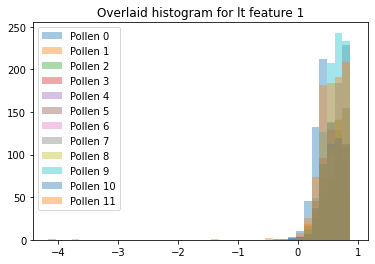

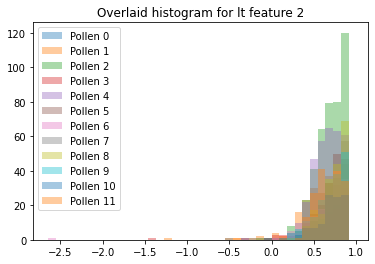

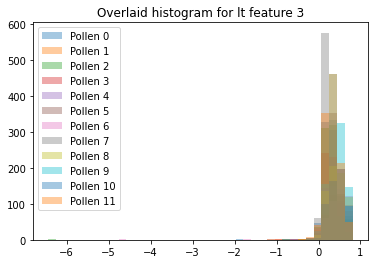

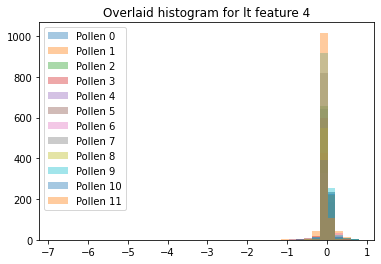

In [ ]:
#We can get a visual representation below
for i in ['lt feature 1', 'lt feature 2', 'lt feature 3', 'lt feature 4']: #For every feature
    p0 = list(results[results['Pollen'] == 0][i].dropna())
    p1 = list(results[results['Pollen'] == 1][i].dropna())
    p2 = list(results[results['Pollen'] == 2][i].dropna())
    p3 = list(results[results['Pollen'] == 3][i].dropna())
    p4 = list(results[results['Pollen'] == 4][i].dropna())
    p5 = list(results[results['Pollen'] == 5][i].dropna())
    p6 = list(results[results['Pollen'] == 6][i].dropna())
    p7 = list(results[results['Pollen'] == 7][i].dropna())
    p8 = list(results[results['Pollen'] == 8][i].dropna())
    p9 = list(results[results['Pollen'] == 9][i].dropna())
    p10 = list(results[results['Pollen'] == 10][i].dropna())
    p11 = list(results[results['Pollen'] == 11][i].dropna())
    xmin = min(min(p0), min(p1), min(p2), min(p3), min(p4), min(p5), min(p6), min(p7), min(p8), min(p9), min(p10), min(p11)) #Dimensions of the plot
    xmax = max(max(p0), max(p1), max(p2), max(p3), max(p4), max(p5), max(p6), max(p7), max(p8), max(p9), max(p10), max(p11))
    width = (xmax - xmin) / 40
    #Draw the plots, arranging adelie as red, gentoo as green, chinstrap as blue
    sns.distplot(p0, kde=False, bins=np.arange(xmin, xmax, width)) 
    sns.distplot(p1, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p2, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p3, kde=False, bins=np.arange(xmin, xmax, width)) 
    sns.distplot(p4, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p5, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p6, kde=False, bins=np.arange(xmin, xmax, width)) 
    sns.distplot(p7, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p8, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p9, kde=False, bins=np.arange(xmin, xmax, width)) 
    sns.distplot(p10, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p11, kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Pollen 0', 'Pollen 1', 'Pollen 2', 'Pollen 3', 'Pollen 4', 'Pollen 5', 'Pollen 6', 'Pollen 7', 'Pollen 8', 'Pollen 9', 'Pollen 10', 'Pollen 11' ]) #Legends for plot
    plt.title('Overlaid histogram for {}'.format(i)) #Title
    plt.show()

Notes: There is too much different pollen types and features to plot and effectively plot and make sense of it. Might need to tweak plotting parameters? And plot by different categories of data? I.e., EDA lifetime, size, scattering, seperately and then consolidate their EDA later

# Outlier Detection and normalization


In [ ]:
# def detect_outlier(feature, dataframe):
#     outliers = []
#     data = dataframe[feature]
#     mean = np.mean(data)
#     std =np.std(data)
    
    
#     for y in data:
#         z_score= (y - mean)/std 
#         if np.abs(z_score) > 3: #z_score is how may std above the mean, we are checking for 3 std above the mean
#             outliers.append(y)
#     print('\nOutlier caps for {}:'.format(feature))
#     print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
#                                                              len([i for i in data
#                                                                   if i > data.quantile(.95)])))
#     print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
#     print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
#                                                            len([i for i in data
#                                                                 if i > data.quantile(.99)])))

In [ ]:
feature_names = []
for col in features.columns:
    feature_names.append(col)
# for feat in feature_names:
#     detect_outlier(feat,results)

In [ ]:
thresh = 3
data = results.copy()
for feat in feature_names:
    mean = np.mean(data[feat])
    std = np.std(data[feat]) 
    for x in data[feat]:
        z = (x-mean)/std
        if z > thresh:
            data[feat] = data[feat].replace(x,mean)

In [ ]:
# data.iloc[:,:].hist(figsize=(20,10),bins=30, edgecolor='black')
# plt.show()

In [ ]:
y = data['Pollen'] # we are using channel as target variable
X = data.drop(['Pollen'], axis=1)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.4, random_state=42)
X_test, X_Val, y_test, y_Val = train_test_split(X_test, y_test, shuffle = True, test_size=0.5, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [ ]:
columns = X_train.columns

standardScaler = pd.DataFrame(x_train, columns=columns)

standardScaler.head()

,"350-400 nm, t=0","350-400 nm, t=1","350-400 nm, t=2","350-400 nm, t=3","350-400 nm, t=4","350-400 nm, t=5","350-400 nm, t=6","350-400 nm, t=7","350-400 nm, t=8","350-400 nm, t=9",...,"angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119",size,lt feature 1,lt feature 2,lt feature 3,lt feature 4
0,-0.627708,-1.474181,-1.562630,-2.269988,-2.115761,-1.396486,-0.219562,1.243089,2.842885,2.619373,...,19.237060,3.928279,2.935771,6.579596,9.997677,2.711269,-0.751682,0.460240,1.092954,0.020641
1,0.152778,0.092812,2.276853,0.787232,-1.185615,-1.178689,-0.842455,-0.944834,-0.922803,-1.333949,...,-0.059573,-0.059819,-0.053500,-0.062068,-0.059407,-0.233657,0.767222,0.460240,0.889126,2.473979
2,-0.129698,0.559791,0.764166,1.264197,1.244393,0.329270,-0.752834,-0.651374,-0.408735,-0.543362,...,-0.059573,-0.059819,-0.053500,-0.062068,-0.059407,1.150244,1.050601,-0.268161,-0.635651,-0.534035
3,-0.314959,-0.886741,-0.985835,0.158896,1.299673,2.242682,2.685226,2.970158,2.802419,2.490283,...,-0.059573,-0.059819,-0.053500,-0.062068,-0.059407,0.901985,1.050601,-0.089609,0.724235,0.128598
4,0.591337,-0.560527,-1.083265,-2.271781,-2.637426,-2.258300,-1.222722,-1.138645,-0.831718,-0.646678,...,-0.059573,-0.059819,-0.053500,-0.062068,-0.059407,-0.302838,-2.440367,0.460240,-0.059942,-0.055854


In [ ]:
print(data.shape)
data.head()

(9866, 2630)


,Pollen,"350-400 nm, t=0","350-400 nm, t=1","350-400 nm, t=2","350-400 nm, t=3","350-400 nm, t=4","350-400 nm, t=5","350-400 nm, t=6","350-400 nm, t=7","350-400 nm, t=8",...,"angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119",size,lt feature 1,lt feature 2,lt feature 3,lt feature 4
0,0,-0.010454,0.000201,0.010856,0.114194,0.217531,0.166868,0.116204,0.109168,0.102131,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.513989,0.280202,1.0,0.134079,-0.008439
1,0,0.119942,0.184249,0.248555,0.236994,0.225434,0.098988,-0.028179,-0.054191,-0.081647,...,0.000000,0.000000,0.000000,0.000000,0.000000,19.461646,0.481173,1.0,0.266975,0.140432
2,0,-0.016149,0.063383,0.142915,0.286637,0.430359,0.262414,0.094469,0.082761,0.071054,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.726931,0.519641,1.0,0.145762,0.002905
3,0,0.067116,0.198401,0.329687,0.366400,0.403114,0.235325,0.067536,0.063644,0.059752,...,14.088371,12.621426,11.445568,10.200185,10.393801,35.178985,0.639556,1.0,0.305319,-0.015814
4,0,-0.043760,0.090762,0.225284,0.214749,0.204214,0.213128,0.222042,0.133712,0.044571,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.672308,0.624575,1.0,0.396259,-0.059949


In [ ]:
# le = LabelEncoder()
# y_trainer = le.fit_transform(y_train)
# y_tester = le.fit_transform(y_test)
# n_classes = 12
# y_trainer = to_categorical(y_trainer, n_classes)
# y_tester = to_categorical(y_tester, n_classes)
# y_Val = le.fit_transform(y_Val)
# y_Val = to_categorical(y_Val, n_classes)

In [ ]:
# model = Sequential()
# model.add(tf.keras.layers.Input(shape = 2629,))
# model.add(tf.keras.layers.Dense(512,activation = 'relu'))
# model.add(tf.keras.layers.Dense(128,activation = 'relu'))
# # model.add(tf.keras.layers.Dense(128,activation = 'relu'))
# # model.add(tf.keras.layers.Dense(64,activation = 'relu'))
# model.add(tf.keras.layers.Dense(12,activation = 'softmax'))


# model.compile(optimizer =SGD(lr = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy", Precision(), Recall()])#metrics = ["accuracy", Precision(), Recall()]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_train = le.fit_transform(y_train) #https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
y_test = le.transform(y_test)
y_train = pd.DataFrame(y_train.reshape(len(y_train),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))
y_train = tf.keras.utils.to_categorical(y_train,12)
y_test = tf.keras.utils.to_categorical(y_test,12)
y_Val = le.fit_transform(y_Val)
y_Val = to_categorical(y_Val, 12)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_Val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_Val.shape)

(5919, 2629)
(1973, 2629)
(1974, 2629)
(5919, 12)
(1973, 12)
(1974, 12)


In [ ]:
# ann = Sequential()
# ann.add(tf.keras.layers.Input(shape = 2629,))
# ann.add(tf.keras.layers.Dense(512,activation = 'relu'))
# ann.add(tf.keras.layers.Dense(64,activation = 'relu'))
# ann.add(tf.keras.layers.Dropout(0.3))
# ann.add(tf.keras.layers.Dense(128,activation = 'relu'))
# ann.add(tf.keras.layers.Dense(256,activation = 'relu'))
# ann.add(tf.keras.layers.Dropout(0.3))
# ann.add(tf.keras.layers.Dense(12,activation = 'softmax'))


#NOTE: Document our different processes and what activation algorithms and our loss functions 
#For bookkeeping!!! It's important!!!!


# ann.compile(optimizer =SGD(lr = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy", Precision(), Recall()])#metrics = ["accuracy", Precision(), Recall()]


In [ ]:
# model = Sequential()
# model.add(tf.keras.layers.Input(shape = 2629,))
# model.add(tf.keras.layers.Dense(20,activation = 'relu'))
# model.add(tf.keras.layers.Dense(10,activation = 'relu'))
# model.add(tf.keras.layers.Dense(12,activation = 'relu'))
# model.add(tf.keras.layers.Dropout(0.5))

# model.add(tf.keras.layers.Dense(12,activation = 'softmax'))


# model.compile(optimizer =SGD(lr = 0.001, momentum=0.9), loss = "categorical_crossentropy", metrics = ["accuracy", Precision(), Recall()])#metrics = ["accuracy", Precision(), Recall()]


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(2629),
    tf.keras.layers.Dense(2048),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(400),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(12, activation="softmax")
    ])
model.compile(optimizer =SGD(lr = 0.001,momentum=0.9), loss = "categorical_crossentropy", metrics = ["accuracy", Precision(), Recall()])#metrics = ["accuracy", Precision(), Recall()]

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.summary() #Using small subset of data and scaled down neural network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              5386240   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                        

In [ ]:
history = model.fit(x_train,y_train,batch_size=32, epochs =10000, verbose =1, validation_data=(X_Val, y_Val))

Epoch 1/10000
185/185 [==============================] - 16s 75ms/step - loss: 3.1229 - accuracy: 0.1749 - precision: 0.1972 - recall: 0.0759 - val_loss: 2806.5605 - val_accuracy: 0.0836 - val_precision: 0.0836 - val_recall: 0.0836
Epoch 2/10000
185/185 [==============================] - 13s 71ms/step - loss: 2.5384 - accuracy: 0.2634 - precision: 0.3465 - recall: 0.1286 - val_loss: 2407.3679 - val_accuracy: 0.0927 - val_precision: 0.0927 - val_recall: 0.0927
Epoch 3/10000
185/185 [==============================] - 13s 70ms/step - loss: 2.2605 - accuracy: 0.3112 - precision: 0.4308 - recall: 0.1651 - val_loss: 2283.9675 - val_accuracy: 0.1018 - val_precision: 0.1018 - val_recall: 0.1018
Epoch 4/10000
185/185 [==============================] - 13s 70ms/step - loss: 2.0638 - accuracy: 0.3514 - precision: 0.4819 - recall: 0.1865 - val_loss: 2702.6975 - val_accuracy: 0.1008 - val_precision: 0.1008 - val_recall: 0.1008
Epoch 5/10000
185/185 [==============================] - 13s 71ms/step -

In [ ]:
# y_pred = model.predict(x_test)
# y_pred = [np.round(value) for value in y_pred]
# print(classification_report(y_test, y_pred))

In [ ]:
# prediction = model.predict(X[:1])
# np.where(prediction[0] == 1)



In [ ]:
output = model.predict(X) #Results are truncated (outputs where zero are magnitude E-29)

In [ ]:
import pickle
pickle.dump(model, open('/content/drive/MyDrive/ENG 4000/model4.pkl', 'wb'))

In [ ]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [ ]:
#THIS IS A TEST
model.predict(valid_0) #We perform an inference

#So we take the digit we looked at at the beginning of our validation set
#In the 7th position, we can see it has a 92% chance it is a 7
#A 4% chance it is a 9

In [ ]:
#legacy, using old database

X = [1e-02,2e-02,3e-02,4e-02,5e-02,6e-02,7e-02,8e-02,9e-02,10e-02,11e-02,34e-02]

import psycopg2
connection = psycopg2.connect(database="postgres", user="postgres", password="JYjdBJP2Cc7LaaN!", host="db.ddxvuuzejyelldehkgyl.supabase.co", port="5432")
cursor = connection.cursor()
cursor.execute("INSERT INTO model_values VALUES (" + "'" + str(X[0]) + "', " + "'" + str(X[1]) + "', " + "'" + str(X[2]) + "', " + "'" + str(X[3])
 + "', " + "'" + str(X[4]) + "', " + "'" + str(X[5]) + "', " + "'" + str(X[6]) + "', " + "'" + str(X[7]) + "', " + "'" + str(X[8]) + "', " + "'" +
  str(X[9]) + "', " + "'" + str(X[10]) + "', " + "'" + str(X[11]) + "');")

connection.commit()
connection.close()



In [ ]:
# for X in output:
#   cursor.execute("INSERT INTO model_values VALUES (" + "'" + str(X[0]) + "', " + "'" + str(X[1]) + "', " + "'" + str(X[2]) + "', " + "'" + str(X[3])
#  + "', " + "'" + str(X[4]) + "', " + "'" + str(X[5]) + "', " + "'" + str(X[6]) + "', " + "'" + str(X[7]) + "', " + "'" + str(X[8]) + "', " + "'" +
#   str(X[9]) + "', " + "'" + str(X[10]) + "', " + "'" + str(X[11]) + "');")

In [ ]:
#Working code, using new google sql database

X = [121e-02,2e-02,3e-02,4e-02,5e-02,6e-02,7e-02,8e-02,9e-02,10e-02,11e-02,34e-02] # test data

from google.cloud.sql.connector import Connector, IPTypes
import sqlalchemy

def getconn():
    with Connector() as connector:
        conn = connector.connect(
            "potent-comfort-376221:northamerica-northeast2:the-pollen-project", 
            "pg8000",
            user="postgres",
            password="lLyl3\"{xg9`X*t`Q",
            db="postgres",
            ip_type=IPTypes.PUBLIC 
        )
    return conn

pool = sqlalchemy.create_engine(
    "postgresql+pg8000://",
    creator=getconn,
)

with pool.connect() as db_conn:

    result = db_conn.execute("INSERT INTO pollen_data VALUES ( now(), '" + str(X[0]) + "', " + "'" + str(X[1])
     + "', " + "'" + str(X[2]) + "', " + "'" + str(X[3]) + "', " + "'" + str(X[4]) + "', " + "'" + str(X[5])
      + "', " + "'" + str(X[6]) + "', " + "'" + str(X[7]) + "', " + "'" + str(X[8]) + "', " + "'" + str(X[9])
       + "', " + "'" + str(X[10]) + "', " + "'" + str(X[11]) + "')")

In [ ]:
#Working code, modified by Randy and Jimmy to be compatable with new SQL database
#!pip install "cloud-sql-python-connector[pg8000]"
from google.cloud.sql.connector import Connector, IPTypes
import sqlalchemy
from sqlalchemy import text

test = np.round(output, 3)

def getconn():
    with Connector() as connector:
        conn = connector.connect(
            "potent-comfort-376221:northamerica-northeast2:the-pollen-project", 
            "pg8000",
            user="postgres",
            password="lLyl3\"{xg9`X*t`Q",
            db="postgres",
            ip_type=IPTypes.PUBLIC 
        )
    return conn

pool = sqlalchemy.create_engine("postgresql+pg8000://",creator=getconn,)
i = 1
with pool.connect() as db_conn:
    for X in test:
        db_conn.execute("INSERT INTO pollen_data VALUES (" + str(X[0]) + ", " + "" + str(X[1]) + ", "
          + str(X[2]) + ", " + str(X[3]) + ", " + str(X[4]) + ", " + str(X[5]) + ", " + str(X[6]) + ", "
           + str(X[7]) + ", " + str(X[8]) + ", " +  str(X[9]) + ", " + str(X[10]) + ", " +  str(X[11])  + ", " + str(i) + ")")
        i+=1

ModuleNotFoundError: ignored

In [ ]:
import csv

with open("data.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(output)


In [ ]:
from google.colab import auth
auth.authenticate_user()


#@markdown Please fill in the value below with your GCP project ID and then run the cell.

# Please fill in these values.
project_id = "the-pollen-project" #@param {type:"string"}

# Quick input validations.
assert project_id, "⚠️ Please provide a Google Cloud project ID"

# Configure gcloud.
!gcloud config set project {project_id}

# grant Cloud SQL Client role to authenticated user
current_user = !gcloud auth list --filter=status:ACTIVE --format="value(account)"

!gcloud projects add-iam-policy-binding {project_id} \
  --member=user:{current_user[0]} \
  --role="roles/cloudsql.client"

!gcloud services enable sqladmin.googleapis.com


